# Linear Regression

After conducting exploratory data analysis (EDA), the next step in the data analysis process is often to build a predictive model. One commonly used method for building such models is linear regression. Linear regression is a statistical approach for modeling the relationship between a dependent variable and one or more independent variables. It assumes that there is a linear relationship between the dependent variable and each independent variable, and seeks to find the line of best fit that describes this relationship.

## Star age prediction

We can begin by performing a multi-variable linear regression on stellar age using other stellar properties as the predictor variables such as its mass, luminosity, surface gravity etc.
Because the dataset is planet based, there may be multiple instances of the star present in the rows. We will need to first find those duplicates and remove them from the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math

df = pd.read_csv('exoplanet_dataset.csv')
df = df.groupby(['hostname', 'st_lum', 'st_rad', 'st_teff', 'st_mass', 'st_met', 'st_logg', 'st_age', 'st_dens']).apply(lambda x: x.drop_duplicates())
df = df[['hostname', 'st_lum', 'st_rad', 'st_teff', 'st_mass', 'st_met', 'st_metratio', 'st_logg', 'st_age', 'st_dens']]

df = df.dropna() # Drop nan values

In [2]:
print(f"Total number of entries: {len(df)}")
print(f"df['st_lum']   min: {df['st_lum'].min():<10} max: {df['st_lum'].max():<10} mean: {df['st_lum'].mean():<10}")
print(f"df['st_rad']   min: {df['st_rad'].min():<10} max: {df['st_rad'].max():<10} mean: {df['st_rad'].mean():<10}")
print(f"df['st_teff']  min: {df['st_teff'].min():<10} max: {df['st_teff'].max():<10} mean: {df['st_teff'].mean():<10}")
print(f"df['st_mass']  min: {df['st_mass'].min():<10} max: {df['st_mass'].max():<10} mean: {df['st_mass'].mean():<10}")
print(f"df['st_met']   min: {df['st_met'].min():<10} max: {df['st_met'].max():<10} mean: {df['st_met'].mean():<10}")
print(f"df['st_logg']  min: {df['st_logg'].min():<10} max: {df['st_logg'].max():<10} mean: {df['st_logg'].mean():<10}")
print(f"df['st_age']   min: {df['st_age'].min():<10} max: {df['st_age'].max():<10} mean: {df['st_age'].mean():<10}")
print(f"df['st_dens']  min: {df['st_dens'].min():<10} max: {df['st_dens'].max():<10} mean: {df['st_dens'].mean():<10}")

Total number of entries: 3909
df['st_lum']   min: -3.257     max: 2.13       mean: -0.096437707853671
df['st_rad']   min: 0.11       max: 6.3        mean: 1.0530135584548477
df['st_teff']  min: 2566.0     max: 10900.0    mean: 5500.219739063699
df['st_mass']  min: 0.09       max: 2.78       mean: 0.9696444103351242
df['st_met']   min: -0.92      max: 0.56       mean: 0.02361089792785879
df['st_logg']  min: 2.95       max: 5.4        mean: 4.423998465080584
df['st_age']   min: 0.0        max: 14.9       mean: 4.431542849833717
df['st_dens']  min: 0.00401    max: 107.44923  mean: 2.9118800204655924


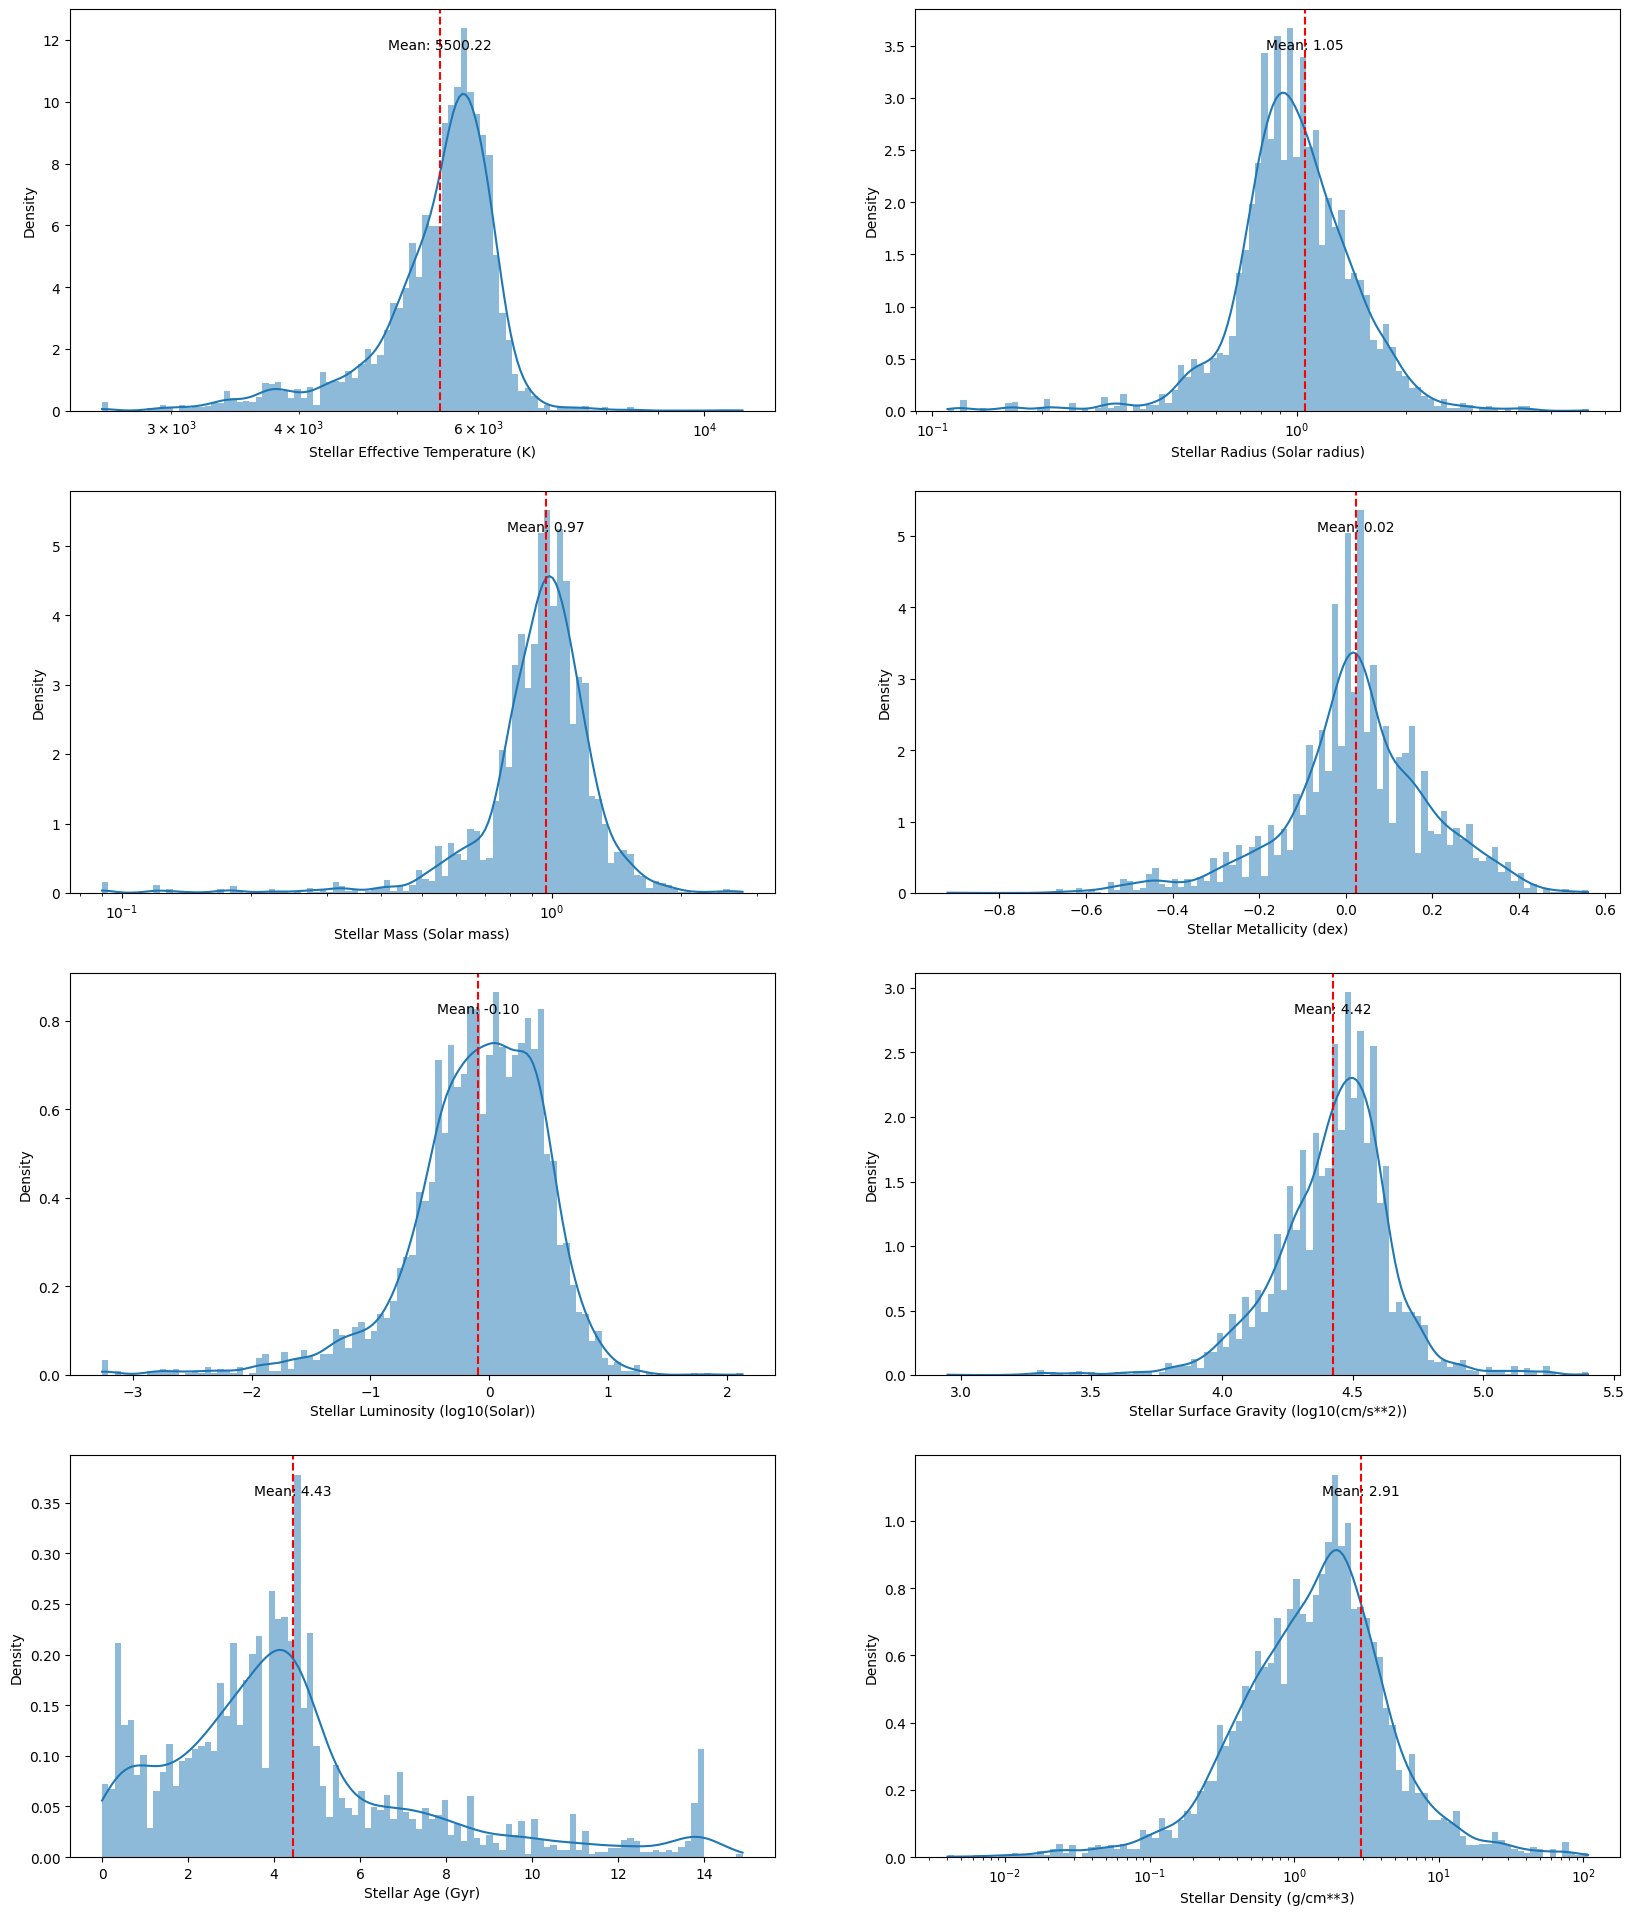

In [3]:
fig, ax = plt.subplots(4,2,figsize=(20,24))
axes = ax.flatten()

def graph_histplot(x, ax, xlabel, log_scale=True):
    sns.histplot(df[x], ax=ax, kde=True, stat='density', linewidth=0, log_scale=log_scale,  x=x, legend=False, bins=100)
    mean = np.mean(df[x])
    ax.axvline(x=mean, color='r', linestyle='--', label='Mean')
    ax.set_xlabel(xlabel)
    ax.text(mean, ax.get_ylim()[1]*0.9, f'Mean: {mean:0.2f}', ha='center')
        
graph_histplot('st_teff', axes[0], 'Stellar Effective Temperature (K)')
graph_histplot('st_rad', axes[1], 'Stellar Radius (Solar radius)')
graph_histplot('st_mass', axes[2], 'Stellar Mass (Solar mass)')
graph_histplot('st_met', axes[3], 'Stellar Metallicity (dex)', log_scale=False)
graph_histplot('st_lum', axes[4], 'Stellar Luminosity (log10(Solar))', log_scale=False)
graph_histplot('st_logg', axes[5], 'Stellar Surface Gravity (log10(cm/s**2))', log_scale=False)
graph_histplot('st_age', axes[6], 'Stellar Age (Gyr)', log_scale=False)
graph_histplot('st_dens', axes[7], 'Stellar Density (g/cm**3)')

plt.show()

## Feature Scaling

Since many of the planetary features have different data ranges, they should be transformed to a common scale to avoid incorrectly placing more importance on features with larger values. For example, `st_lum` is measured in units of solar in log scale ranging between [-6.09, 3.8] in value whereas `st_teff` is measured in Kelvin ranging betweeon [2566, 20900]. Since the temperature variable has a bigger range, it will outweigh the luminosity variable due to its larger value but it should not imply that temperature value is more important predictor for the model. 

First, features measured in log scales should be transformed back to the original values by applying the base 10 exponential function. 


### Standardization (z-score normalization)

Standardization rescales the data so that the dataset has a mean of $\mu = 0$ and standard deviation of $\sigma = 1$. This method works well on normally distributed data.

$${x_{new}}^{(i)} = {{(x^{(i)} - \mu)} \over \sigma}$$

### Min-max normalization

Normalization rescales the data so that each of the value falls between 0 and 1.

$${x_{new}}^{(i)} = {{(x^{(i)} - x_{min})} \over {(x_{max} - x_{min})}}$$ 

In [7]:
# Apply base 10 exponential function to log scales
df['st_lum'] = df['st_lum'].apply(lambda x: np.power(10,x))
df['st_logg'] = df['st_logg'].apply(lambda x: np.power(10,x))
df['st_met'] = df['st_met'].apply(lambda x: np.power(10,x))

print(f"df['st_lum']   min: {df['st_lum'].min():<22} max: {df['st_lum'].max():<20} mean: {df['st_lum'].mean():<10}")
print(f"df['st_rad']   min: {df['st_rad'].min():<22} max: {df['st_rad'].max():<20} mean: {df['st_rad'].mean():<10}")
print(f"df['st_teff']  min: {df['st_teff'].min():<22} max: {df['st_teff'].max():<20} mean: {df['st_teff'].mean():<10}")
print(f"df['st_mass']  min: {df['st_mass'].min():<22} max: {df['st_mass'].max():<20} mean: {df['st_mass'].mean():<10}")
print(f"df['st_met']   min: {df['st_met'].min():<22} max: {df['st_met'].max():<20} mean: {df['st_met'].mean():<10}")
print(f"df['st_logg']  min: {df['st_logg'].min():<22} max: {df['st_logg'].max():<20} mean: {df['st_logg'].mean():<10}")
print(f"df['st_age']   min: {df['st_age'].min():<22} max: {df['st_age'].max():<20} mean: {df['st_age'].mean():<10}")
print(f"df['st_dens']  min: {df['st_dens'].min():<22} max: {df['st_dens'].max():<20} mean: {df['st_dens'].mean():<10}")

df['st_lum']   min: 0.0005533501092157366  max: 134.89628825916532   mean: 1.5470842456621599
df['st_rad']   min: 0.11                   max: 6.3                  mean: 1.0530135584548477
df['st_teff']  min: 2566.0                 max: 10900.0              mean: 5500.219739063699
df['st_mass']  min: 0.09                   max: 2.78                 mean: 0.9696444103351242
df['st_met']   min: 0.12022644346174129    max: 3.630780547701014    mean: 1.1374007084409876
df['st_logg']  min: 891.2509381337459      max: 251188.6431509582    mean: 30035.677301309475
df['st_age']   min: 0.0                    max: 14.9                 mean: 4.431542849833717
df['st_dens']  min: 0.00401                max: 107.44923            mean: 2.9118800204655924


## Linear regression assumptions

1. Linear relationship
- there must exist a linear relationship between each independent variables and the dependent variable
2. Homoscedasticity
- the residuals have constant variance at every level of x
3. Normality
- the residuals of the model are normally distributed

### Linear relationship test

You can visually determine if there is a linear relationship between the variable x and y by creating a scatter plot. If the points roughly fall under a straigt line, it indicates that there is a linear relationship.

Text(0, 0.5, 'Radius [log(Solar]')

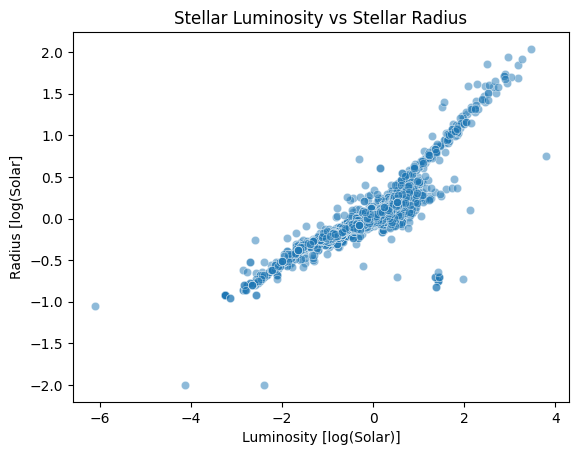

In [2]:
fig, ax = plt.subplots()
sns.scatterplot(x='st_lum', y='st_rad',ax=ax, data=df, alpha=0.5)
ax.set_title('Stellar Luminosity vs Stellar Radius')
ax.set_xlabel('Luminosity [log(Solar)]')
ax.set_ylabel('Radius [log(Solar]')
plt.show()

In [3]:
# hypothesis tests to determine whether there are any significant differences the two group ex) t-test
# statistical tests to determine whethger a data set deviates from the expectations of a normal distribution ex) D'Agostino-Pearson omnibus, Shapiro-Wilk, Kolmogorov-Smirnov
# Null hypothesis (P > 0.05) -> values are sampled from a population that follows a normal distribution
# Alternative hypothesis (P <= 0.05) -> values are not sampled from a population that follows a normal distribution


# from scipy import stats

# k2, p = stats.normaltest(df['pl_bmassj'])
# print(f"pl_bmassj      k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(np.log10(df['pl_bmassj']))
# print(f"log(pl_bmassj) k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(df['st_teff'])
# print(f"st_teff        k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(df['pl_eqt'])
# print(f"pl_eqt         k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(np.log10(df['pl_eqt']))
# print(f"log(pl_eqt)    k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(df['st_logg'])
# print(f"st_logg        k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(df['st_met'])
# print(f"st_met         k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(df['st_dens'])
# print(f"st_dens        k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(np.log10(df['st_dens']))
# print(f"log(st_dens)   k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")

In [4]:
# # df.skew()
# # df.kurtosis()
# df = df[['pl_orbper', 'pl_orbsmax', 'pl_radj', 'pl_orbeccen', 'pl_dens', 'pl_bmassj', 'st_mass', 'st_teff', 'pl_eqt', 'st_logg', 'st_met', 'st_dens', 'st_lum']]

# print(len(df))

# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)

# sdf = df[(df >= q1) & (df <= q3)]

# # mask = df.between(q1, q3, inclusive=True)

# # Filtering the initial dataframe with a mask
# # iqr = df.loc[mask]
# sdf = sdf.dropna() # Drop nan values
# print(len(sdf))

In [5]:

# k2, p = stats.normaltest(sdf['pl_bmassj'])
# print(f"pl_bmassj      k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(np.log10(sdf['pl_bmassj']))
# print(f"log(pl_bmassj) k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(sdf['st_teff'])
# print(f"st_teff        k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(sdf['pl_eqt'])
# print(f"pl_eqt         k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(np.log10(sdf['pl_eqt']))
# print(f"log(pl_eqt)    k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(sdf['st_logg'])
# print(f"st_logg        k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(sdf['st_met'])
# print(f"st_met         k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(sdf['st_dens'])
# print(f"st_dens        k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")
# k2, p = stats.normaltest(np.log10(sdf['st_dens']))
# print(f"log(st_dens)   k2: {k2:<20} p: {p:<25} P > 0.05: {p > 0.05}")

## Split dataset into Train and Test

Among the planets that have the temperature data, split the dataset into two groups: train(70%) and test(30%).

In [6]:
from sklearn.model_selection import train_test_split

y = df['st_rad']
X = df['st_lum']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random state is used to get the same output each time

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 1)  # change shape from (R,) to (R, 1)
X_test = X_test.reshape(X_test.shape[0], 1)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (3577, 1)
y_train shape: (3577,)
X_test shape: (1534, 1)
y_test shape: (1534,)


## Compute cost

The model function for linear regression which is a function that maps from `X` (planet parameters) to `y` (planet effective temperature (K)) is represented as: $$f_{W,b}(X) = WX + b$$
To train this linear regression model, you need to find the best $(W,b)$ parameters that fit your dataset.
To compare how a one parameter $(W,b)$ is better or worse than another is by evaluating it with a cost function $J(W,b)$.


The cost function is defined as: $$J(W,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{W,b}(X^{(i)}) - y^{(i)})^2$$

where $m$ is the number of training examples, $f_{W,b}(X^{(i)})$ is the model's prediction of the planet's effective temperature and $y^{(i)}$ is the actual effective temperature from the dataset.

In [7]:
def compute_cost(X, y, W, b): 
    """
    Computes the cost function for multi-variable linear regression.
    
    Arguments:
    X: input matrix of shape (m, n) (Planet parameters) 
    y: output vector of shape (m, 1) (Actual effective temperature of the planet)
    W: weight vector of shape (1, n)
    b: bias scalar
    
    Returns
    cost -- scalar value of the cost function
    """
    
    m = X.shape[0] # number of training examples
    f_Wb = np.dot(X, W.T) + b  # predicted output values
    loss = (f_Wb - y)**2  # squared error 
    cost = np.sum(loss) / (2 * m)  # compute cost using mean squared error

    return cost

## Gradient descent

The parameter that fits the data best will have the smallest cost $J(W,b)$. Gradient descent is used to find that smallest cost by stepping closer to the optimal value. 
The algorithm for gradient descent is:
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline\; 
& \phantom {0000} b := b -  \alpha \frac{\partial J(W,b)}{\partial b} \newline\; 
& \phantom {0000} W := W -  \alpha \frac{\partial J(W,b)}{\partial W} \; \newline 
& \rbrace\end{align*}$$

where parameters $W$, $b$ are both updated simultaniously and where:
$$\frac{\partial J(W,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{W,b}(X^{(i)}) - y^{(i)})$$

$$\frac{\partial J(W,b)}{\partial W}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{W,b}(X^{(i)}) -y^{(i)})X^{(i)}$$

In [8]:
def compute_gradient(X, y, W, b): 
    """
    Compute the gradient of the cost function for multi-variable linear regression.

    Arguments:
    X: input matrix of shape (m, n) (Planet parameters) 
    y: output vector of shape (m, 1) (Actual effective temperature of the planet)
    W: weight vector of shape (1, n)
    b: bias scalar
    
    Returns
    dj_dW: The gradient of the cost with respect to the parameters W
    dj_db: The gradient of the cost with respect to the parameter b     
    """
    
    m = X.shape[0]  # number of training examples
    f_Wb = np.dot(X, W.T) + b  # predicted output values
    diff = f_Wb - y  # difference between predicted and true output values

    dj_dW = np.dot(diff.T, X) / m  # gradient with respect to the weights
    dj_db = np.sum(diff) / m  # gradient with respect to the bias

    return dj_dW, dj_db

## Batch gradient descent

In [9]:
def gradient_descent(X, y, W_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent

    Arguments:
    X: input matrix of shape (m, n)
    y: output vector of shape (m, 1)
    W_in: initial weight vector of shape (1, n)
    b_in: initial bias scalar
    cost_function: function to compute the cost given X, y, W, and b
    gradient_function: function to compute the gradient of the cost function given X, y, W, and b
    alpha: learning rate
    num_iters: number of iterations to run gradient descent

    Returns:
    W: optimal weight vector of shape (1, n)
    b: optimal bias scalar
    """

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    W_history = []
    W = copy.deepcopy(W_in)  # Avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dW, dj_db = gradient_function(X, y, W, b)  

        # Update Parameters using w, b, alpha and gradient
        W = W - alpha * dj_dW               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost = cost_function(X, y, W, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            W_history.append(W)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return W, b, J_history, W_history # Return W and J,W history for graphing

In [10]:
def xavier_uniform_init(m, n):
    """
    Initialize weights using Xavier Uniform initialization
    
    Arguments:
    m: number of samples
    n: number of features
    
    Returns:
    tensor with weights initialized using Xavier Uniform initialization
    """
    fan_in, fan_out = m, n
    limit = np.sqrt(6 / (fan_in + fan_out))
    weights = np.random.uniform(low=-limit, high=limit, size=(m, n))
    
    return weights

In [11]:
m,n = X_train.shape # m is the number of samples and n is the number of features

initial_W = xavier_uniform_init(m, n)
initial_b = 0.0

# gradient descent settings
iterations = 1500
alpha = 0.0001

In [12]:
W,b,J_history,W_history = gradient_descent(X_train, y_train, initial_W, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("W,b found by gradient descent:", W, b)

Iteration    0: Cost   145.40   
Iteration  150: Cost   145.25   
Iteration  300: Cost   145.20   
Iteration  450: Cost   145.15   
Iteration  600: Cost   145.10   
Iteration  750: Cost   145.05   
Iteration  900: Cost   145.00   
Iteration 1050: Cost   144.96   
Iteration 1200: Cost   144.91   
Iteration 1350: Cost   144.86   
W,b found by gradient descent: [[-0.01085633]
 [-0.02399557]
 [-0.03611691]
 ...
 [ 0.0162525 ]
 [-0.02376704]
 [ 0.00441193]] 0.011343297453258874


In [13]:
def predict(X, W, b):
    """
    Predicts the target variable given the input features and learned parameters.

    Parameters:
    X: input matrix of shape (m, n)
    W: weight vector of shape (n, 1)
    b: bias scalar

    Returns:
    y_pred: predicted targe variable of shape shape (m, 1).
    """
    y_pred = np.dot(X, W.T) + b

    return y_pred

In [14]:
# Compute accuracy on our training set
p = predict(X_train, W,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 0.000000


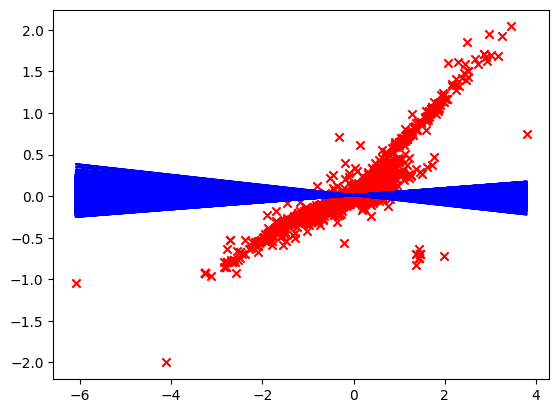

In [15]:
# Plot the linear fit
plt.plot(X_train, p, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='r') 
plt.show()